# Resolução Missao

In [15]:
# Declarando pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# lendo arquivo

df = pd.read_json('dados_compras.json', orient='records')

In [17]:
df.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


In [18]:
df.describe()

,Idade,Item ID,Valor
count,780.000000,780.000000,780.000000
mean,22.729487,91.292308,2.931192
std,6.930604,52.707897,1.115780
min,7.000000,0.000000,1.030000
25%,19.000000,44.000000,1.960000
50%,22.000000,91.000000,2.880000
75%,25.000000,135.000000,3.910000
max,45.000000,183.000000,4.950000


In [19]:
df.columns

Index(['Login', 'Idade', 'Sexo', 'Item ID', 'Nome do Item', 'Valor'], dtype='object')

In [20]:
infor_compradores = df.loc[:,['Sexo', 'Login', 'Idade']]
infor_compradores.head(6)

,Sexo,Login,Idade
0,Masculino,Aelalis34,38
1,Masculino,Eolo46,21
2,Masculino,Assastnya25,34
3,Masculino,Pheusrical25,21
4,Masculino,Aela59,23
5,Masculino,Tanimnya91,20


In [21]:
infor_compradores = infor_compradores.drop_duplicates()
p1_count = infor_compradores.count()[0]
p1_count

573

In [22]:
# valores em branco?

df.isnull().any()

# Portanto, não há valores em branco na tabela;

Login           False
Idade           False
Sexo            False
Item ID         False
Nome do Item    False
Valor           False
dtype: bool

In [23]:
# Existem valores duplicados? Não sabemos, por isso retiramos os 
# duplicados, para isso utilizamos a tabela normal, já que ela não
# possui valores em branco;

infor_compradores_sem_dup = infor_compradores.drop_duplicates()

print('Dimensão tabela sem duplicados: ',infor_compradores_sem_dup.shape)


print('Dimensão tabela com duplicados: ',infor_compradores.shape)


# portanto, tinhamos valores duplicados. 

Dimensão tabela sem duplicados:  (573, 3)
Dimensão tabela com duplicados:  (573, 3)


In [29]:
# Podemos agora saber qual o número total de consumidores;

total_consumidores = infor_compradores.count()[0]
print('O número total de consumidores é: ',total_consumidores)
pd.DataFrame({'Total de consumidores' :[total_consumidores]})

O número total de consumidores é:  573


,Total de consumidores
0,573


 # <font color='black'>Análise de Compra</font>    


AxesSubplot(0.125,0.125;0.775x0.755)


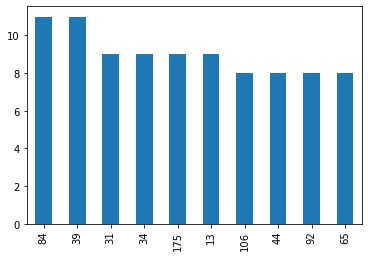

In [30]:
# Análise das compras em geral

#Plotando o número de compras total por ID;

print (df['Item ID'].value_counts().head(10).plot(kind='bar'))



In [31]:
#Total de Itens;

total_itens = df['Nome do Item'].count()

print ('Número total de items vendidos: ',total_itens)

# Itens únicos:

item_unico = len(df['Item ID'].unique())

print ('Número total de items exclusivos: ',item_unico)
# Preço médio;

preco_medio = df['Valor'].mean()

print("O preço médio é %.2f" % preco_medio)

# Preço total:
preco_total = df['Valor'].sum()

print('O preço total = ', preco_total)

#####
# DataFrame para os resultados;

resultados = pd.DataFrame({'Número Itens exclusivos': item_unico, 
                           'Número de Compras': total_itens,
                          'Total de vendas': preco_total,
                          'Preco medio de vendas': [preco_medio]})
resultados



Número total de items vendidos:  780
Número total de items exclusivos:  183
O preço médio é 2.93
O preço total =  2286.33


,Número Itens exclusivos,Número de Compras,Total de vendas,Preco medio de vendas
0,183,780,2286.33,2.931192


# Informações Demográficas por Gênero

In [32]:
# Número de compradores por gênero e porcentagem
compradores_genero = infor_compradores['Sexo'].value_counts()
print(compradores_genero)
print('\n')

compradores_porcentagem = (compradores_genero/total_consumidores)*100
print(compradores_porcentagem)
print('\n')

# DataFrame

compradores_dados = pd.DataFrame({'Sexo': compradores_genero,
                                'Porcentagem %': compradores_porcentagem})

# Data

compradores_dados = compradores_dados.round(2)
compradores_dados ['Porcentagem %'] = compradores_dados['Porcentagem %'].map('{:,.2f}%'.format)

compradores_dados

Masculino                465
Feminino                 100
Outro / Não Divulgado      8
Name: Sexo, dtype: int64


Masculino                81.151832
Feminino                 17.452007
Outro / Não Divulgado     1.396161
Name: Sexo, dtype: float64




,Sexo,Porcentagem %
Masculino,465,81.15%
Feminino,100,17.45%
Outro / Não Divulgado,8,1.40%


# Análise de Compra por Gênero

In [33]:
# Criando as tabelas

# Total geral
total_genero_por_item = df.groupby(['Sexo']).sum()['Valor'].rename('Total de Vendas')

# Média Geral
media_preco_genero_por_item = df.groupby(['Sexo']).mean()['Valor'].rename('Média de preço')

# Contagem Geral
contagem_compras = df.groupby(['Sexo']).count()['Valor'].rename('Número de compras')

# Média Total individual dos Gêneros 
total_individual_genero = total_genero_por_item/compradores_dados['Sexo']


# DataFram

analise_genero = pd.DataFrame({'Número Compras': contagem_compras,
                               'Média Geral por item': media_preco_genero_por_item,
                               'Total geral por genero': total_genero_por_item,
                              'Media total individual por gênero Normalizado': total_individual_genero})

# Formatação dos dados


analise_genero = analise_genero.round(2)
analise_genero['Total geral por genero'] = analise_genero['Total geral por genero'].map('${:,.2f}'.format) 
analise_genero['Média Geral por item'] = analise_genero['Média Geral por item'].map('${:,.2f}'.format)
analise_genero['Media total individual por gênero Normalizado'] = analise_genero['Media total individual por gênero Normalizado'].map('${:,.2f}'.format) 
analise_genero

,Número Compras,Média Geral por item,Total geral por genero,Media total individual por gênero Normalizado
Sexo,,,,
Feminino,136,$2.82,$382.91,$3.83
Masculino,633,$2.95,"$1,867.68",$4.02
Outro / Não Divulgado,11,$3.25,$35.74,$4.47


# Análise Demográfica

In [34]:
infor_compradores

,Sexo,Login,Idade
0,Masculino,Aelalis34,38
1,Masculino,Eolo46,21
2,Masculino,Assastnya25,34
3,Masculino,Pheusrical25,21
4,Masculino,Aela59,23
...,...,...,...
771,Masculino,Lassista97,24
772,Masculino,Sidap51,15
773,Masculino,Chamadarsda63,21
778,Masculino,Quelaton80,20


In [53]:
# Cálculo de idade básico
idade_bin = [0, 9.99, 14.99, 19.99, 24.99, 29.99, 34.99, 39.99, 999]
label_idade = ['Menor de 10', '10 - 14', '15 - 19', '20 - 24',
               '25 - 29', '30 - 34', '35 - 39', 'Acima de 40']
df['Intervalo de Idades'] = pd.cut(
    df['Idade'], idade_bin, labels=label_idade)

# Cálculos

contagem_idade = df['Intervalo de Idades'].value_counts()

media_idade = df.groupby(['Intervalo de Idades']).mean()['Valor']

total_item_idade = df.groupby(['Intervalo de Idades']).sum()['Valor']

idade_porcent = (contagem_idade/total_consumidores)*100

#DataFrame resultados;

idade_dataframe = pd.DataFrame({'Contagem:': contagem_idade,
                      '%': idade_porcent,
                    'Media de Idade, unitário': media_idade,
                     'total_item_idade': total_item_idade})

# Data munging

idade_dataframe ['Media de Idade, unitário'] = idade_dataframe['Media de Idade, unitário'].map('${:,.2f}'.format)
idade_dataframe['total_item_idade'] = idade_dataframe['total_item_idade'].map('${:,.2f}'.format)
idade_dataframe['%'] = idade_dataframe['%'].map('{:,.2f}%'.format)
idade_dataframe.sort_index()

,Contagem:,%,"Media de Idade, unitário",total_item_idade
Menor de 10,28,4.89%,$2.98,$83.46
10 - 14,35,6.11%,$2.77,$96.95
15 - 19,133,23.21%,$2.91,$386.42
20 - 24,336,58.64%,$2.91,$978.77
25 - 29,125,21.82%,$2.96,$370.33
30 - 34,64,11.17%,$3.08,$197.25
35 - 39,42,7.33%,$2.84,$119.40
Acima de 40,17,2.97%,$3.16,$53.75


# Top Gastadores;

In [67]:
#Cálculos

usuario_total = df.groupby(['Login']).sum()['Valor'].rename('Valor total de compra')
usuario_media = df.groupby(['Login']).mean()['Valor'].rename('Valor médio de compra')
usuario_contagem = df.groupby(['Login']).count()['Valor'].rename('Numero de compras')

# Dataframe

usuario_dados = pd.DataFrame({'Valor total de compra': usuario_total,
                              'Valor médio de compra': usuario_media,
                              'Numero de compras': usuario_contagem})

# Data formatação

usuario_dados['Valor total de compra'] = usuario_dados['Valor total de compra'].map('${:,.2f}'.format)
usuario_dados['Valor médio de compra'] = usuario_dados['Valor médio de compra'].map('${:,.2f}'.format)
usuario_dados.sort_values('Valor total de compra', ascending=False).head(5)



,Valor total de compra,Valor médio de compra,Numero de compras
Login,,,
Qarwen67,$9.97,$2.49,4
Sondim43,$9.38,$3.13,3
Tillyrin30,$9.19,$3.06,3
Lisistaya47,$9.19,$3.06,3
Tyisriphos58,$9.18,$4.59,2


# Itens mais populares

In [70]:
# Calculos básicos

usuario_total = df.groupby(['Nome do Item']).sum()['Valor'].rename('Valor total de compra')
usuario_media = df.groupby(['Nome do Item']).mean()['Valor'].rename('Valor médio de compra')
usuario_contagem = df.groupby(['Nome do Item']).count()['Valor'].rename('Numero de compras')


# Dataframe

usuario_dados = pd.DataFrame({'Valor total de compra': usuario_total,
                              'Valor médio de compra': usuario_media,
                              'Numero de compras': usuario_contagem})

# Data formatação

usuario_dados['Valor total de compra'] = usuario_dados['Valor total de compra'].map('${:,.2f}'.format)
usuario_dados['Valor médio de compra'] = usuario_dados['Valor médio de compra'].map('${:,.2f}'.format)
usuario_dados.sort_values('Numero de compras', ascending=False).head(5)



,Valor total de compra,Valor médio de compra,Numero de compras
Nome do Item,,,
Final Critic,$38.60,$2.76,14
Arcane Gem,$24.53,$2.23,11
"Betrayal, Whisper of Grieving Widows",$25.85,$2.35,11
Stormcaller,$34.65,$3.46,10
Woeful Adamantite Claymore,$11.16,$1.24,9


# Itens mais lucrativos

In [83]:
# Calculos básicos

usuario_total = df.groupby(['Nome do Item']).sum()['Valor'].rename('Valor total de compras')
usuario_media = df.groupby(['Nome do Item']).mean()['Valor'].rename('Valor médio de compra')
usuario_contagem = df.groupby(['Nome do Item']).count()['Valor'].rename('Numero de compras')


# Dataframe

usuario_dados = pd.DataFrame({'Valor total de compras': usuario_total,
                              'Valor médio de compra': usuario_media,
                              'Numero de compras': usuario_contagem})

# Data formatação

usuario_dados['Valor total de compras'] = usuario_dados['Valor total de compras'].map('${:,.2f}'.format)
usuario_dados['Valor médio de compra'] = usuario_dados['Valor médio de compra'].map('${:,.2f}'.format)
usuario_dados.sort_values('Numero de compras', ascending=False).head(5)



,Valor total de compras,Valor médio de compra,Numero de compras
Nome do Item,,,
Final Critic,$38.60,$2.76,14
Arcane Gem,$24.53,$2.23,11
"Betrayal, Whisper of Grieving Widows",$25.85,$2.35,11
Stormcaller,$34.65,$3.46,10
Woeful Adamantite Claymore,$11.16,$1.24,9
